# Alternative unsupervised methodologies

In this frameworkm we explore alternative clustering methodologies for creating profile groups.

## Imports

In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import hdbscan

## Load data

In [2]:
readings_task_usage_df = pd.read_csv("data/sample_jobs_summary_10perc.csv", header=[0,1], index_col=[0])

In [3]:
readings_task_usage_df

CPU rate           canonical memory usage            \
                mean       std                   mean       std   
job ID                                                            
3418437     0.004019  0.002592               0.118794  0.003088   
6590376     0.000950  0.000309               0.077765  0.000220   
109344935   0.000169  0.000045               0.038912  0.000131   
155171765   0.000897  0.000522               0.090313  0.001801   
182939990   0.007996  0.003112               0.032971  0.007517   
...              ...       ...                    ...       ...   
6486611558  0.000570  0.000691               0.000328  0.000568   
6486612437  0.001862  0.002919               0.000269  0.000465   
6486622446  0.000504  0.000734               0.000242  0.000411   
6486628168  0.000718  0.000804               0.000016  0.000027   
6486631320  0.001362  0.002419               0.000485  0.000472   

           local disk space usage           active tasks            \
                             mean       std         mean       std   
job ID                                                               
3418437                  0.000242  0.000030     1.999282  0.026796   
6590376                  0.000197  0.000011     1.999401  0.024463   
109344935                0.000087  0.000002     1.999641  0.018950   
155171765                0.000197  0.000013     1.999521  0.021880   
182939990                0.000188  0.000009     2.997488  0.068259   
...                           ...       ...          ...       ...   
6486611558               0.000000  0.000000     1.000000  0.000000   
6486612437               0.000000  0.000000     1.000000  0.000000   
6486622446               0.000000  0.000000     4.129630  6.695665   
6486628168               0.000000  0.000000     1.000000  0.000000   
6486631320               0.000000  0.000000     1.652174  1.368765   

              job runtime  
                     vals  
job ID                     
3418437     2505600000000  
6590376     2505600000000  
109344935   2505600000000  
155171765   2505600000000  
182939990   2505600000000  
...                   ...  
6486611558      261000000  
6486612437       28000000  
6486622446       95000000  
6486628168       12000000  
6486631320       55000000  

[65488 rows x 9 columns]

In [4]:
readings_task_usage_df.dropna(inplace=True)

### Perform some preprocessing

In [5]:
scaler = MinMaxScaler()

In [6]:
scaled = scaler.fit_transform(readings_task_usage_df)

## DBSCAN

### K-Dist graph

First of all, we compute the k-dist graph, i.e., a plot that helps investigating one of the best $\epsilon$ value for DBSCAN. In fact, DBSCAN is based on two essential parameters:
1. $\epsilon$: the radius of the hypersphere where DBSCAN looks for neighbors
2. $MinPoints$: the minimum number of points necessary to declare an area (the sphere with radius $\epsilon$) as dense.

In [7]:
# https://stackoverflow.com/questions/43160240/how-to-plot-a-k-distance-graph-in-python

neighbors = 200 #len(scaled)
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(scaled)
distances, indices = nbrs.kneighbors(scaled)
distances

array([[0.00000000e+00, 5.47504980e-02, 7.09107510e-02, ...,
        2.35156055e-01, 2.35160805e-01, 2.35283654e-01],
       [0.00000000e+00, 2.00494695e-02, 6.50879095e-02, ...,
        1.71968039e-01, 1.72188415e-01, 1.72564060e-01],
       [0.00000000e+00, 2.50592777e-02, 3.84044688e-02, ...,
        1.24310070e-01, 1.29095054e-01, 1.34288814e-01],
       ...,
       [0.00000000e+00, 3.02163123e-04, 5.21658628e-04, ...,
        1.72673089e-03, 1.72990479e-03, 1.73129646e-03],
       [0.00000000e+00, 1.54163344e-04, 1.82644207e-04, ...,
        7.59422649e-04, 7.60780947e-04, 7.62504219e-04],
       [0.00000000e+00, 3.14213287e-04, 4.96604807e-04, ...,
        9.28189078e-04, 9.30373976e-04, 9.32474485e-04]])

In [8]:
#min_samples = 50
k_sample = distances[:, neighbors - 1]
k_sample = sorted(k_sample)

max(k_sample)


1.2656104459869677

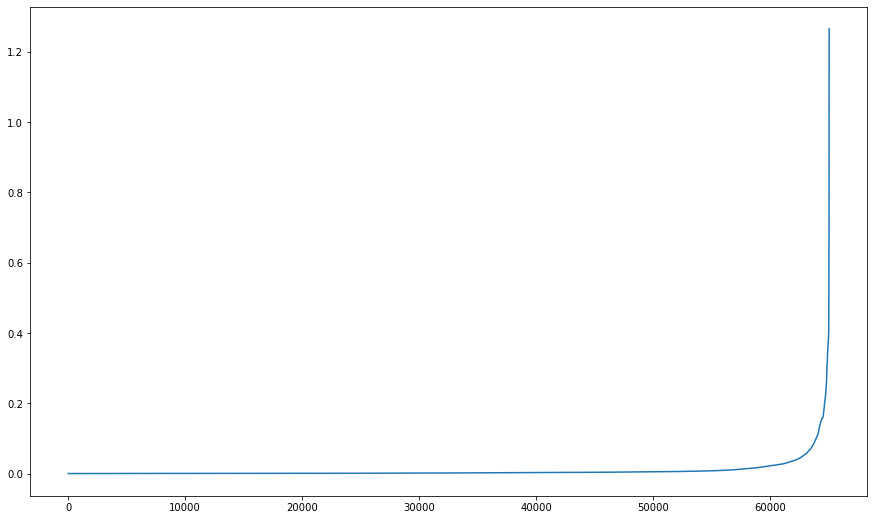

In [9]:
plt.figure(figsize=(15, 9))


plt.plot(range(len(k_sample)), k_sample)

In [10]:
k_sample[int(len(k_sample)*0.9)]

0.015331103993777124

In [11]:
clustering = DBSCAN(eps=0.015, min_samples=50).fit(scaled)

In [12]:
Counter(clustering.labels_)

Counter({-1: 3290, 0: 123, 1: 61227, 2: 257, 3: 96, 4: 63})

## HDBSCAN

In [13]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=200, gen_min_span_tree=True)
clusterer.fit(scaled)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=200)

<AxesSubplot:ylabel='$\\lambda$ value'>

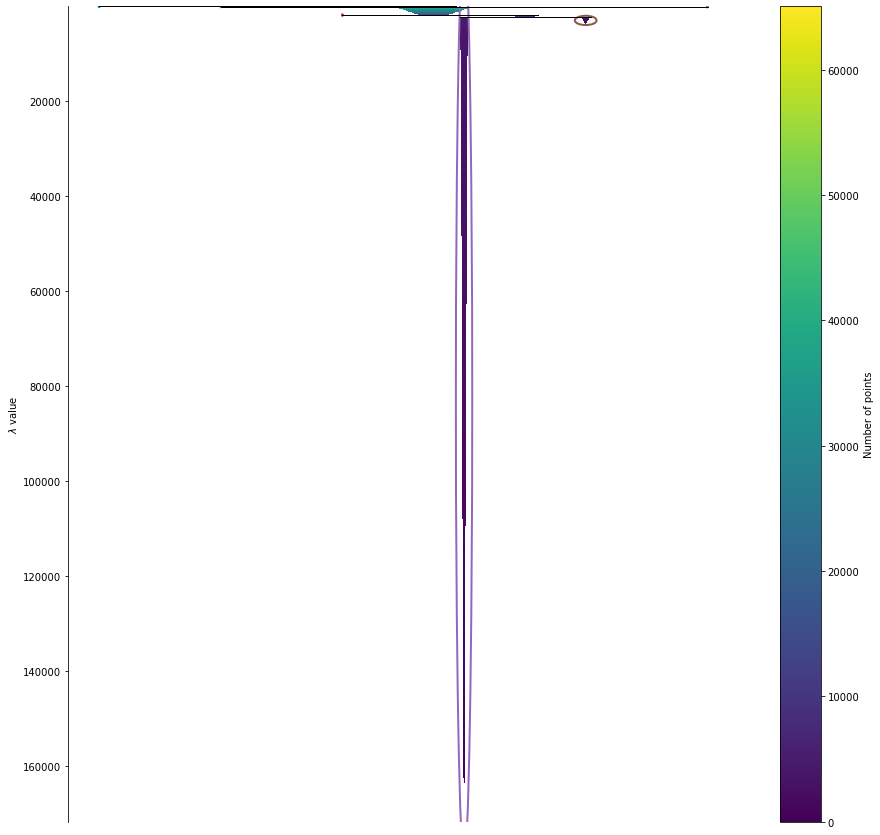

In [14]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

## Watermark

In [15]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2022-01-24T23:18:03.217020+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 4.18.0-193.28.1.el8_2.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 80
Architecture: 64bit

hdbscan   : 0.8.27
pandas    : 1.3.5
matplotlib: 3.4.3
seaborn   : 0.11.0

